In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# download libraries from github 
!git clone https://github.com/borisgarbuzov/Numerical_python_core.git

Cloning into 'Numerical_python_core'...
remote: Enumerating objects: 97, done.
remote: Counting objects: 100% (97/97), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 97 (delta 5), reused 94 (delta 5), pack-reused 0
Unpacking objects: 100% (97/97), done.


In [3]:
# modificate sys variable to importing github modules
import sys
sys.path.insert(0, '/content/Numerical_python_core/Python Code')


## Minimization Along a Line

goldSearch

This module contains the bracketing and the golden section search algorithms. For
the factor that multiplies successive search intervals in bracket we chose c = 1 + R.

In [4]:
## module goldSearch
''' a,b = bracket(f,xStart,h)
    Finds the brackets (a,b) of a minimum point of the
    user-supplied scalar function f(x).
    The search starts downhill from xStart with a step
    length h.

    x,fMin = search(f,a,b,tol=1.0e-6)
    Golden section method for determining x that minimizes
    the user-supplied scalar function f(x).
    The minimum must be bracketed in (a,b).
'''       
import math
def bracket(f,x1,h):
    c = 1.618033989 
    f1 = f(x1)
    x2 = x1 + h; f2 = f(x2)
  # Determine downhill direction and change sign of h if needed
    if f2 > f1:
        h = -h
        x2 = x1 + h; f2 = f(x2)
      # Check if minimum between x1 - h and x1 + h
        if f2 > f1: return x2,x1 - h 
  # Search loop
    for i in range (100):    
        h = c*h
        x3 = x2 + h; f3 = f(x3)
        if f3 > f2: return x1,x3
        x1 = x2; x2 = x3
        f1 = f2; f2 = f3
    print("Bracket did not find a mimimum")

def search(f,a,b,tol=1.0e-9):
    nIter = int(math.ceil(-2.078087*math.log(tol/abs(b-a))))
    R = 0.618033989
    C = 1.0 - R
  # First telescoping
    x1 = R*a + C*b; x2 = C*a + R*b
    f1 = f(x1); f2 = f(x2)
  # Main loop
    for i in range(nIter):
        if f1 > f2:
            a = x1
            x1 = x2; f1 = f2
            x2 = C*a + R*b; f2 = f(x2)
        else:
            b = x2
            x2 = x1; f2 = f1
            x1 = R*a + C*b; f1 = f(x1)
    if f1 < f2: return x1,f1
    else: return x2,f2


Example

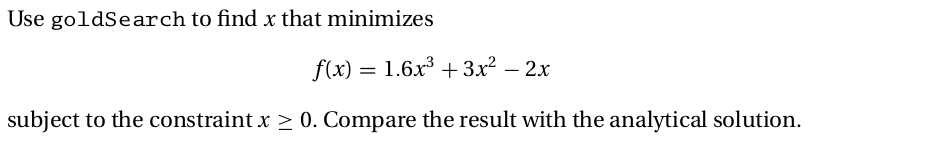

In [5]:
# Solution
def f(x):
    lam = 1.0 # Constraint multiplier
    c = min(0.0, x) # Constraint function
    return 1.6*x**3 + 3.0*x**2 - 2.0*x + lam*c**2


xStart = 1.0
h = 0.01
x1,x2 = bracket(f,xStart,h)
x,fMin = search(f,x1,x2)
print("x =",x)
print("f(x) =",fMin)

x = 0.2734941131714084
f(x) = -0.28985978554959224


Example

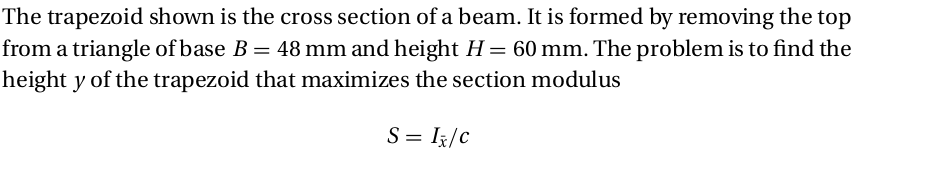

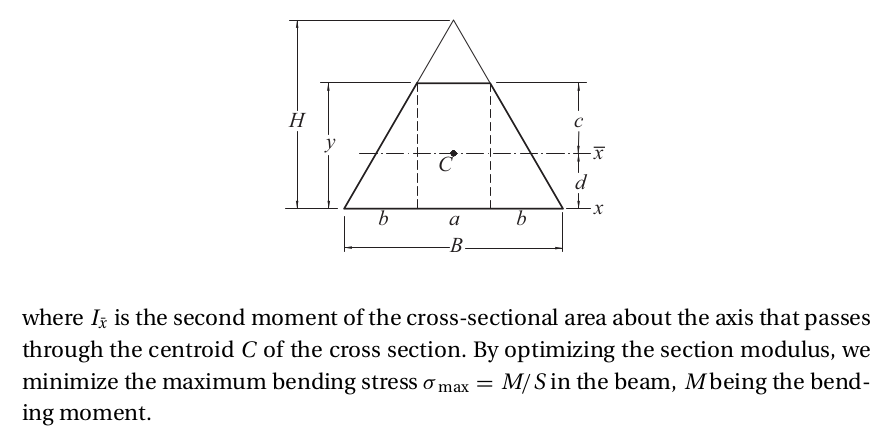

In [6]:
# Solution
def f(y):
    B = 48.0
    H = 60.0
    a = B*(H - y)/H
    b = (B - a)/2.0
    A = (B + a)*y/2.0
    Q = (a*y**2)/2.0 + (b*y**2)/3.0
    d = Q/A
    c = y - d
    I = (a*y**3)/3.0 + (b*y**3)/6.0
    Ibar = I - A*d**2
    return -Ibar/c

yStart = 60.0 # Starting value of y
h = 1.0 # Size of first step used in bracketing
a,b = bracket(f,yStart,h)
yOpt,fOpt = search(f,a,b)
print("Optimal y =",yOpt)
print("Optimal S =",-fOpt)
print("S of triangle =",-f(60.0))

Optimal y = 52.17627387056691
Optimal S = 7864.430941364856
S of triangle = 7200.0


## Powell’s Method

powell

The algorithm for Powell’s method is listed next. It uses two arrays: df contains the
decreases of the merit function in the first n moves of a cycle, and the matrix u stores
the corresponding direction vectors v i (one vector per row).

In [7]:
## module powell
''' xMin,nCyc = powell(F,x,h=0.1,tol=1.0e-6)
    Powell's method of minimizing user-supplied function F(x).
    x    = starting point
    h   = initial search increment used in 'bracket'
    xMin = mimimum point
    nCyc = number of cycles
'''
import numpy as np
from goldSearch import *
import math

def powell(F,x,h=0.1,tol=1.0e-6):
    
    def f(s): return F(x + s*v)    # F in direction of v

    n = len(x)                     # Number of design variables
    df = np.zeros(n)               # Decreases of F stored here
    u = np.identity(n)             # Vectors v stored here by rows
    for j in range(30):            # Allow for 30 cycles:
        xOld = x.copy()            # Save starting point
        fOld = F(xOld)
      # First n line searches record decreases of F
        for i in range(n):
            v = u[i]
            a,b = bracket(f,0.0,h)
            s,fMin = search(f,a,b)
            df[i] = fOld - fMin
            fOld = fMin
            x = x + s*v
      # Last line search in the cycle    
        v = x - xOld
        a,b = bracket(f,0.0,h)
        s,fLast = search(f,a,b)
        x = x + s*v
      # Check for convergence
        if math.sqrt(np.dot(x-xOld,x-xOld)/n) < tol: return x,j+1
      # Identify biggest decrease & update search directions
        iMax = np.argmax(df)
        for i in range(iMax,n-1):
            u[i] = u[i+1]
        u[n-1] = v
    print("Powell did not converge")
        

Example



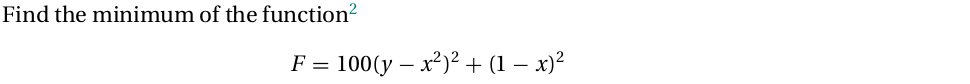

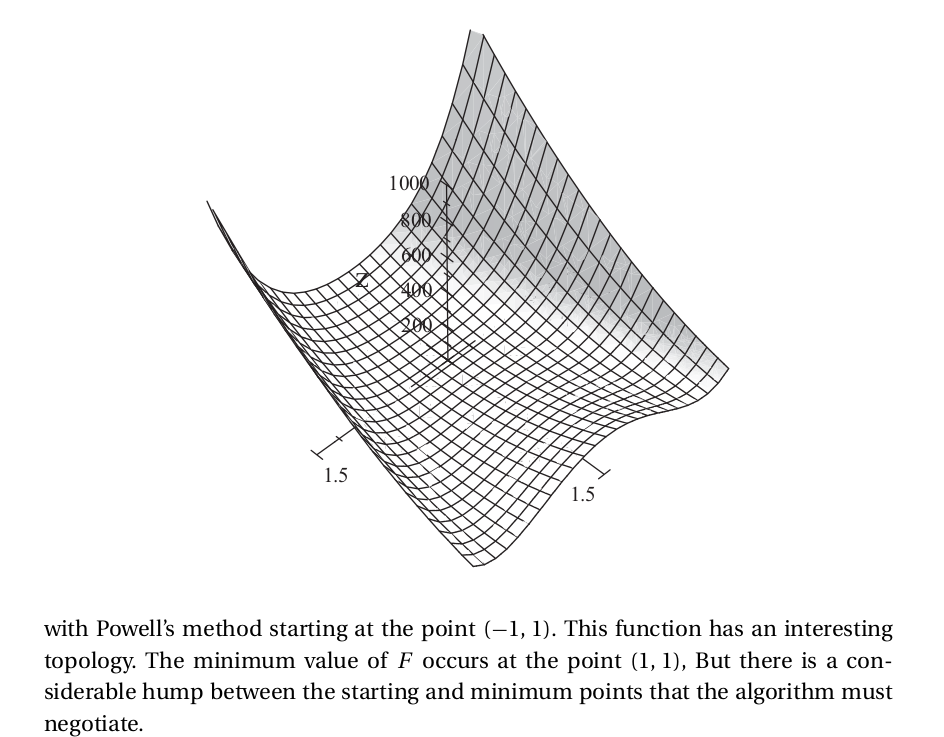

In [8]:
# Solution

from numpy import array

def F(x): 
  return 100.0*(x[1] - x[0]**2)**2 + (1 - x[0])**2

xStart = array([-1.0, 1.0])
xMin,nIter = powell(F,xStart)
print("x =",xMin)
print("F(x) =",F(xMin))
print("Number of cycles =",nIter)

x = [1. 1.]
F(x) = 3.717507015854018e-29
Number of cycles = 12


Example

Use powell to determine the smallest distance from the point (5, 8) to the curve
xy = 5.

In [9]:
# Solution
from math import sqrt


def F(x):
    lam = 1.0 # Penalty multiplier
    c = x[0]*x[1] - 5.0 # Constraint equation
    return distSq(x) + lam*c**2 # Penalized merit function



def distSq(x): 
    return (x[0] - 5)**2 + (x[1] - 8)**2


xStart = array([ 1.0,5.0])
x,numIter = powell(F,xStart,0.1)
print("Intersection point =",x)
print("Minimum distance =", sqrt(distSq(x)))
print("xy =", x[0]*x[1])
print("Number of cycles =",numIter)


Intersection point = [0.73306761 7.58776385]
Minimum distance = 4.28679958766998
xy = 5.562343874620907
Number of cycles = 5


In [10]:
# Check previous solution
from newtonRaphson2 import *

def F(x):
    return np.array([2.0*(x[0] - 5.0) + x[2]*x[1], 2.0*(x[1] - 8.0) + x[2]*x[0], x[0]*x[1] - 5.0])

xStart = np.array([1.0, 5.0, 1.0])
print("x = ", newtonRaphson2(F,xStart))

x =  [0.6556053  7.62653992 1.13928328]


Example

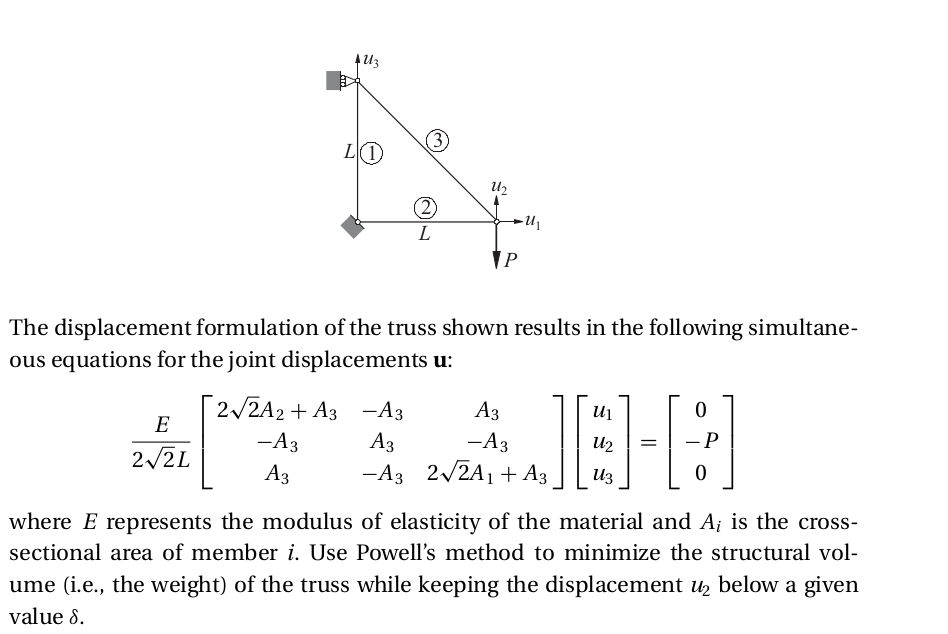

In [11]:
# Solution
from gaussElimin import *

def F(x):
    global v, weight
    lam = 100.0
    c = 2.0*sqrt(2.0)
    A = array([[c*x[1] + x[2], -x[2], x[2]], [-x[2], x[2], -x[2]],  [ x[2],  -x[2], c*x[0] + x[2]]])/c
    
    b = array([0.0, -1.0, 0.0])
    v = gaussElimin(A,b)
    weight = x[0] + x[1] + sqrt(2.0)*x[2]
    penalty = max(0.0,abs(v[1]) - 1.0)**2 + max(0.0,-x[0])**2 + max(0.0,-x[1])**2 + max(0.0,-x[2])**2
    return weight + penalty*lam


xStart = array([1.0, 1.0, 1.0])
x,numIter = powell(F,xStart)
print("x = ",x)
print("v = ",v)
print("Relative weight F = ",weight)
print("Number of cycles = ",numIter)

x =  [3.73870376 3.73870366 5.28732564]
v =  [-0.26747239 -1.06988953 -0.26747238]
Relative weight F =  14.95481504706307
Number of cycles =  10


## Downhill Simplex Method

downhill

The implementation of the downhill simplex method is given next. The starting sim-
plex has one of its vertices at x 0 and the others at x 0 + e i b (i = 1, 2, . . . , n), where e i
is the unit vector in the direction of the x i -coordinate. The user inputs the vector x 0
(called xStart in the program) and the edge length b of the simplex.

In [12]:
## module downhill
''' x = downhill(F,xStart,side=0.1,tol=1.0e-6)
    Downhill simplex method for minimizing the user-supplied
    scalar function F(x) with respect to the vector x.
    xStart = starting vector x.
    side   = side length of the starting simplex (default is 0.1)
'''
import numpy as np
import math

def downhill(F,xStart,side=0.1,tol=1.0e-6):
    n = len(xStart)                 # Number of variables
    x = np.zeros((n+1,n)) 
    f = np.zeros(n+1)
    
  # Generate starting simplex
    x[0] = xStart
    for i in range(1,n+1):
        x[i] = xStart
        x[i,i-1] = xStart[i-1] + side        
  # Compute values of F at the vertices of the simplex     
    for i in range(n+1): f[i] = F(x[i])
    
  # Main loop
    for k in range(500):
      # Find highest and lowest vertices
        iLo = np.argmin(f)
        iHi = np.argmax(f)       
      # Compute the move vector d
        d = (-(n+1)*x[iHi] + np.sum(x,axis=0))/n
      # Check for convergence
        if math.sqrt(np.dot(d,d)/n) < tol: return x[iLo]
        
      # Try reflection
        xNew = x[iHi] + 2.0*d              
        fNew = F(xNew)        
        if fNew <= f[iLo]:        # Accept reflection 
            x[iHi] = xNew
            f[iHi] = fNew
          # Try expanding the reflection
            xNew = x[iHi] + d               
            fNew = F(xNew)
            if fNew <= f[iLo]:    # Accept expansion
                x[iHi] = xNew
                f[iHi] = fNew
        else:
          # Try reflection again
            if fNew <= f[iHi]:    # Accept reflection
                x[iHi] = xNew
                f[iHi] = fNew
            else:
              # Try contraction
                xNew = x[iHi] + 0.5*d
                fNew = F(xNew)
                if fNew <= f[iHi]: # Accept contraction
                    x[iHi] = xNew
                    f[iHi] = fNew
                else:
                  # Use shrinkage
                    for i in range(len(x)):
                        if i != iLo:
                            x[i] = (x[i] - x[iLo])*0.5
                            f[i] = F(x[i])
    print("Too many iterations in downhill")
    return x[iLo]


Example

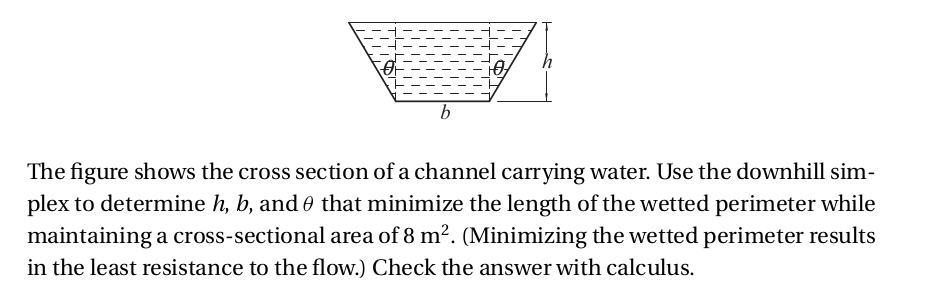

In [13]:
# Solution
def S(x):
    global perimeter,area
    lam = 10000.0
    perimeter = x[0] + 2.0*x[1]/math.cos(x[2])
    area = (x[0] + x[1]*math.tan(x[2]))*x[1]
    return perimeter + lam*(area - 8.0)**2


xStart = np.array([4.0, 2.0, 0.0])
x = downhill(S,xStart)
area = (x[0] + x[1]*math.tan(x[2]))*x[1]
print("b = ",x[0])
print("h = ",x[1])
print("theta (deg) = ",x[2]*180.0/math.pi)
print("area = ",area)
print("perimeter = ",perimeter)

b =  2.4816069147962976
h =  2.149137386944977
theta (deg) =  30.000018579561125
area =  7.999976717752945
perimeter =  7.444828039523396


Example

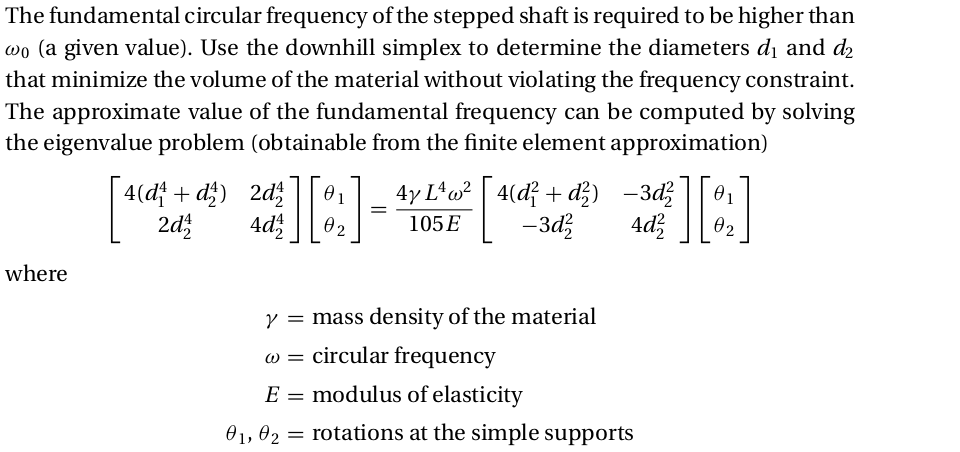

In [14]:
# Solution

from stdForm import *
from inversePower import *

def F(x):
    global eVal
    lam = 1.0e6
    eVal_min = 0.4
    A = np.array([[4.0*(x[0]**4 + x[1]**4), 2.0*x[1]**4], [2.0*x[1]**4, 4.0*x[1]**4]])
    B = np.array([[4.0*(x[0]**2 + x[1]**2), -3.0*x[1]**2], [-3*x[1]**2, 4.0*x[1]**2]])
    H,t = stdForm(A,B)
    eVal,eVec = inversePower(H,0.0)
    return x[0]**2 + x[1]**2 + lam*(max(0.0,eVal_min - eVal))**2

xStart = np.array([1.0,1.0])
x = downhill(F,xStart,0.1)
print("x = ", x)
print("eigenvalue = ",eVal)

x =  [1.07512696 0.79924677]
eigenvalue =  0.39999775723766223
